1. Bibliothèques importées avec succès.

2. Données chargées. Taille du dataset : (442, 11)
   Nature de la cible : Régression (valeurs continues, non catégorielles)

3. Introduction artificielle de valeurs manquantes (NaN)...
   Nombre total de valeurs manquantes générées : 220

4. Nettoyage des données...
   Imputation terminée (les NaN ont été remplacés par la moyenne).
   Valeurs manquantes restantes : 0

5. Analyse Exploratoire (EDA)...
   Statistiques descriptives (premières 5 colonnes) :
              age         sex         bmi          bp          s1
count  442.000000  442.000000  442.000000  442.000000  442.000000
mean     0.000505   -0.000839    0.000197   -0.001107    0.000308
std      0.046542    0.046360    0.045933    0.046392    0.046819
min     -0.107226   -0.044642   -0.090275   -0.112399   -0.126781
25%     -0.033667   -0.044642   -0.032882   -0.035795   -0.032872
50%      0.001751   -0.044642   -0.005128   -0.005670   -0.002257
75%      0.037168    0.050680    0.028

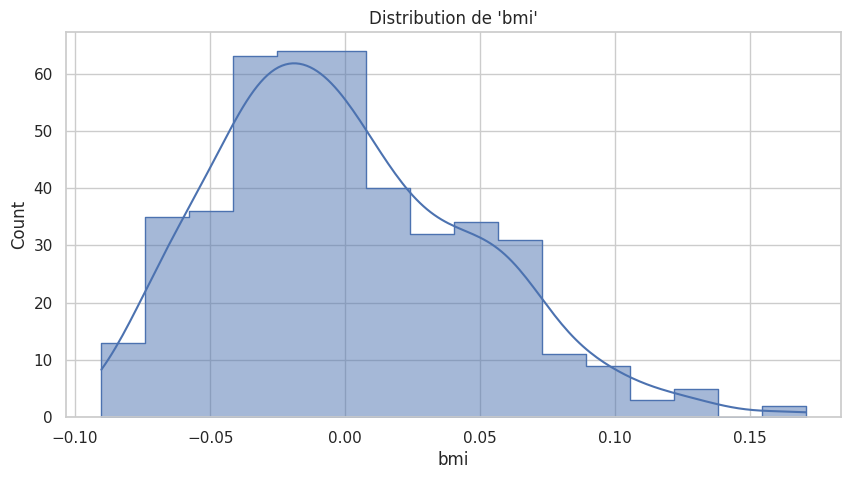

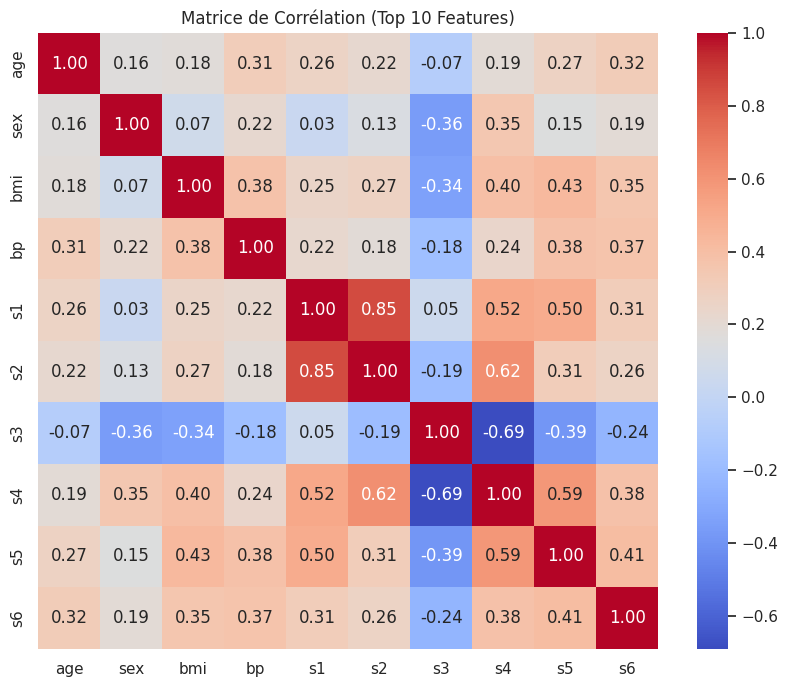


6. Séparation effectuée :
   Entraînement : 353 échantillons
   Test : 89 échantillons

7. Entraînement du modèle (Random Forest Classifier)...
   Modèle entraîné avec succès.

8. Évaluation des performances...
   >>> Mean Squared Error (MSE) : 3012.45
   >>> R-squared (R2 Score) : 0.43


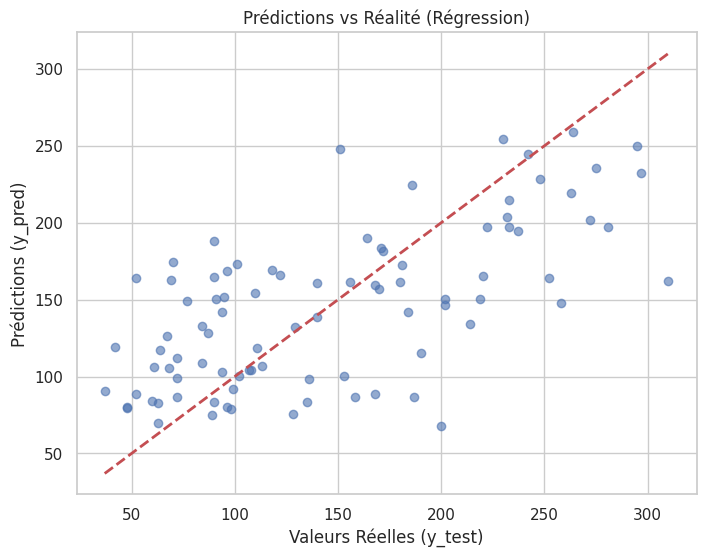


--- FIN DU SCRIPT ---


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modules Scikit-Learn spécifiques
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Configuration pour des graphiques plus esthétiques
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore') # Pour garder la sortie propre

print("1. Bibliothèques importées avec succès.\n")

# ------------------------------------------------------------------------------
# 2. CHARGEMENT DES DONNÉES
# ------------------------------------------------------------------------------
# Chargement du dataset.
#
# >>> POUR CHANGER DE DATASET : REMPLACEZ LA LIGNE SUIVANTE PAR VOTRE PROPRE CHARGEMENT DE DONNÉES. <<<
# >>> L'objet 'data' doit idéalement avoir les attributs '.data', '.feature_names', et '.target'.
# >>> (Exemple: 'from sklearn.datasets import load_iris; data = load_iris()')
data = load_diabetes()

# Création du DataFrame Pandas
# data.data contient les features, data.target contient la cible (0 ou 1)
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(f"2. Données chargées. Taille du dataset : {df.shape}")
# Correction: load_diabetes is a regression dataset, it does not have target_names.
# The target is a continuous value, not discrete classes like 'Malin' or 'Bénin'.
print(f"   Nature de la cible : Régression (valeurs continues, non catégorielles)\n")

# ------------------------------------------------------------------------------
# 3. SIMULATION DE "DONNÉES SALES" (Pour l'exercice)
# ------------------------------------------------------------------------------
# Dans la vraie vie, les données sont rarement parfaites.
# Nous allons introduire artificiellement des valeurs manquantes (NaN) dans 5% des données.
print("3. Introduction artificielle de valeurs manquantes (NaN)...")

np.random.seed(42) # Pour la reproductibilité
mask = np.random.random(df.shape) < 0.05 # Masque de 5%

# On applique les NaN partout sauf sur la colonne 'target' (qu'on ne veut pas abîmer ici)
features_columns = df.columns[:-1]
df_dirty = df.copy()
for col in features_columns:
    df_dirty.loc[df_dirty.sample(frac=0.05).index, col] = np.nan

print(f"   Nombre total de valeurs manquantes générées : {df_dirty.isnull().sum().sum()}\n")

# ------------------------------------------------------------------------------
# 4. NETTOYAGE ET PRÉPARATION (Data Wrangling)
# ------------------------------------------------------------------------------
print("4. Nettoyage des données...")

# Séparation Features (X) et Target (y) AVANT le nettoyage pour éviter les fuites de données
X = df_dirty.drop('target', axis=1)
y = df_dirty['target']

# Imputation : Remplacer les NaN par la MOYENNE de la colonne
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# On remet sous forme de DataFrame pour garder les noms de colonnes (plus propre)
X_clean = pd.DataFrame(X_imputed, columns=X.columns)

print("   Imputation terminée (les NaN ont été remplacés par la moyenne).")
print(f"   Valeurs manquantes restantes : {X_clean.isnull().sum().sum()}\n")

# ------------------------------------------------------------------------------
# 5. ANALYSE EXPLORATOIRE DES DONNÉES (EDA)
# ------------------------------------------------------------------------------
print("5. Analyse Exploratoire (EDA)...")

# A. Aperçu statistique
print("   Statistiques descriptives (premières 5 colonnes) :")
print(X_clean.iloc[:, :5].describe())

# B. Visualisation 1 : Distribution d'une feature clé
plt.figure(figsize=(10, 5))
# Correction: 'mean radius' is specific to breast cancer dataset. For diabetes, we can use a relevant feature.
# Let's pick 'bmi' for the diabetes dataset.
feature_to_plot = 'bmi'
sns.histplot(data=df, x=feature_to_plot, kde=True, element="step") # Removed 'hue' as target is continuous
plt.title(f"Distribution de '{feature_to_plot}'")
plt.show()

# C. Visualisation 2 : Heatmap de corrélation (sur les 10 premières variables pour la lisibilité)
plt.figure(figsize=(10, 8))
correlation_matrix = X_clean.iloc[:, :10].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation (Top 10 Features)")
plt.show()

# ------------------------------------------------------------------------------
# 6. SÉPARATION DES DONNÉES (Train / Test Split)
# ------------------------------------------------------------------------------
# On garde 20% des données pour le test final
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)

print(f"\n6. Séparation effectuée :")
print(f"   Entraînement : {X_train.shape[0]} échantillons")
print(f"   Test : {X_test.shape[0]} échantillons\n")

# ------------------------------------------------------------------------------
# 7. MODÉLISATION (Machine Learning)
# ------------------------------------------------------------------------------
print("7. Entraînement du modèle (Random Forest Classifier)...")

# Correction: For a regression problem, RandomForestClassifier is not suitable.
# We should use RandomForestRegressor instead.
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraînement sur les données d'entraînement uniquement
model.fit(X_train, y_train)
print("   Modèle entraîné avec succès.\n")

# ------------------------------------------------------------------------------
# 8. ÉVALUATION ET PERFORMANCE
# ------------------------------------------------------------------------------
print("8. Évaluation des performances...")

# Prédictions sur le jeu de test (données jamais vues par le modèle)
y_pred = model.predict(X_test)

# Correction: For regression, accuracy_score, classification_report, and confusion_matrix are not applicable.
# We should use regression metrics like mean_squared_error or r2_score.
from sklearn.metrics import mean_squared_error, r2_score

# A. Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"   >>> Mean Squared Error (MSE) : {mse:.2f}")

# B. R-squared (Coefficient de détermination)
r2 = r2_score(y_test, y_pred)
print(f"   >>> R-squared (R2 Score) : {r2:.2f}")

# C. Visualisation des prédictions vs réalité
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Ligne idéale
plt.xlabel('Valeurs Réelles (y_test)')
plt.ylabel('Prédictions (y_pred)')
plt.title('Prédictions vs Réalité (Régression)')
plt.grid(True)
plt.show()

print("\n--- FIN DU SCRIPT ---")